<h1>Inverter Example</h1>
Example taken from <a href='http://www.yzuda.org/download/_GDSII_examples.html'>http://www.yzuda.org/download/_GDSII_examples.html</a>.

<h2>Load gds file</h2>

In [1]:
import gdspy
gdsii = gdspy.GdsLibrary()
lib = gdsii.read_gds(infile='inv.gds2')

/home/rene/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: [GDSPY] Record type PROPATTR (2B) is not supported.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rene/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: [GDSPY] Record type PROPVALUE (2C) is not supported.
  This is separate from the ipykernel package so we can avoid doing imports until


<h2>Create Converter library</h2>
and print list of all layers

In [2]:
#Load library
import GDSLatexConverter

#Create converter
conv = GDSLatexConverter.GDSLatexConverter(lib)

# Display all available layers:
print(conv.all_layer)

[  2   3  41  42  43  44  45  46  47  48  49  50  51 149 162]


<h2>Do a very basic latex line plot</h2>

In [3]:
def save_and_plot(converter, filename):
    latex = conv.get_latex()
    
    # Write the latex output to file
    fout = open(filename + '.tex', 'w+')
    fout.write(latex)
    fout.close()

    # We need to run latex
    import os
    os.system("pdflatex " + filename + ".tex")

    # Show the output pdf
    try:
        from wand.image import Image as WImage
        img = WImage(filename=filename + '.pdf')
        img.rotate(90)
    except:
        img = 'PDF could not be displayed. Please install the library wand (pip install wand).'
    return img

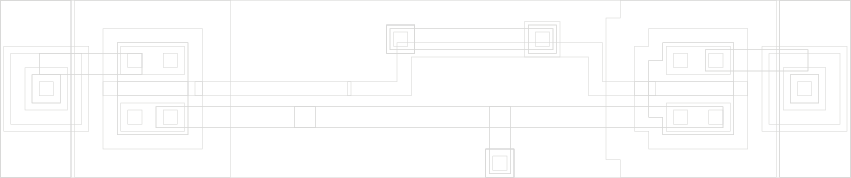

In [4]:
conv = GDSLatexConverter.GDSLatexConverter(lib)
conv.scale = 0.25 #Set a convienient scale for line-thickness

save_and_plot(converter=conv, filename='inv_simple')

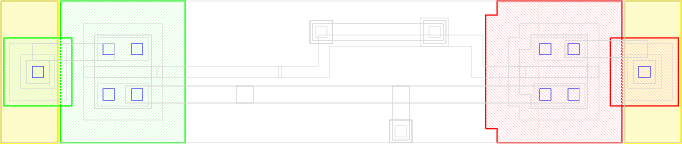

In [5]:
# Add some colors!
conv = GDSLatexConverter.GDSLatexConverter(lib)
conv.scale = 0.2
conv.layer_drawcolor = {
        2: 'yellow',
        41: 'green',
        42: 'red',
        48: 'blue',
}
conv.layer_drawopt = {
        2: 'line width=2, fill=yellow, fill opacity=0.2',
        41: 'line width=1.2, pattern=north west lines, pattern color=green!15, ',
        42: 'line width=1.2, pattern=north east lines, pattern color=red!15,',
}

save_and_plot(converter=conv, filename='inv_simple')

<h2>Layer selection and ordering</h2>

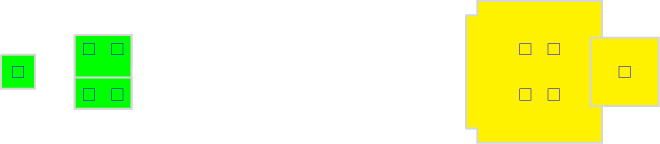

In [6]:
conv = GDSLatexConverter.GDSLatexConverter(lib, layer_order=[43, 42, 48])
conv.scale = 0.2
conv.layer_drawcolor = {
        48: 'blue',
}
conv.layer_drawopt = {
        42: 'line width=2, fill=yellow, ',
        43: 'line width=2, fill=green, ',
}


save_and_plot(converter=conv, filename='inv_order1')

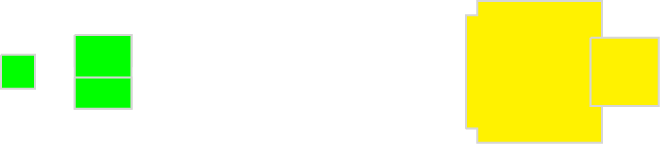

In [7]:
#Not so clever layer order (layer 43 and 42 cover layer 48)
conv.layer_order = [48, 43, 42]
conv.parse() # Force re-parsing
save_and_plot(converter=conv, filename='inv_order2')